In [1]:
#Import Libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge

In [3]:
#Load Data 
csv_data = pd.read_csv("Data.csv")
display(csv_data)

,Date,BCS,ULVR,Rf,Rm,SMB,HML,UMD
0,2017m12,9.657549,3645.343018,0.000225,0.047703,-0.019624,0.020613,-0.001806
1,2017m11,9.170243,3651.641113,0.000292,-0.016561,0.007246,0.015743,0.008872
2,2017m10,8.718375,3744.159912,0.000300,0.018672,-0.007243,-0.001501,0.028707
3,2017m9,9.170243,3787.569336,0.000183,-0.004291,0.024713,-0.003570,-0.024244
4,2017m8,8.702927,3933.649414,0.000142,0.013896,-0.008357,-0.000554,0.031854
...,...,...,...,...,...,...,...,...
200,2001m4,15.330284,586.796082,0.004184,0.060457,-0.001032,0.016497,-0.028050
201,2001m3,14.938417,564.013306,0.004184,-0.050576,-0.036871,0.104753,0.099621
202,2001m2,14.356179,574.571411,0.004385,-0.050766,0.025866,0.038198,0.132797
203,2001m1,15.265091,573.459778,0.004468,0.016129,0.037804,0.039162,-0.055891


In [4]:
#Show Descriptive Statistics of the Stocks
stocks_describe = csv_data[["BCS","ULVR"]]
display(stocks_describe.describe())

,BCS,ULVR
count,205.000000,205.000000
mean,15.782108,1406.469817
std,7.063559,849.919689
min,3.504107,554.526550
25%,11.466057,696.267639
50%,13.961012,1099.918091
75%,19.119701,1973.155518
max,35.634449,3933.649414


In [5]:
#Calculate Daily Stocks’ Interest Returns 
csv_data.sort_index(ascending=False, inplace=True) #[dates are decreasing]
csv_data["BCS_Return"] = csv_data["BCS"].pct_change()
csv_data["ULVR_Return"] = csv_data["ULVR"].pct_change()
stock_daily_interest_returns = csv_data.dropna(inplace=True)
stock_daily_interest_returns = csv_data[["Date", "BCS", "BCS_Return", "ULVR", "ULVR_Return"]]
display(stock_daily_interest_returns) 

,Date,BCS,BCS_Return,ULVR,ULVR_Return
203,2001m1,15.265091,0.006003,573.459778,-0.005011
202,2001m2,14.356179,-0.059542,574.571411,0.001938
201,2001m3,14.938417,0.040557,564.013306,-0.018376
200,2001m4,15.330284,0.026232,586.796082,0.040394
199,2001m5,14.368428,-0.062742,606.584961,0.033724
...,...,...,...,...,...
4,2017m8,8.702927,-0.080149,3933.649414,0.045702
3,2017m9,9.170243,0.053696,3787.569336,-0.037136
2,2017m10,8.718375,-0.049275,3744.159912,-0.011461
1,2017m11,9.170243,0.051829,3651.641113,-0.024710


In [6]:
#Build a Dataframe of Return Interests of Stocks with [ Rf, Rm, SML, HML, UMD ] and Show the Head of the Dataframe.
return_interest_df = csv_data[["Date", "BCS_Return", "ULVR_Return", "Rf", "Rm", "SMB", "HML", "UMD"]]
display(return_interest_df.head()) 

,Date,BCS_Return,ULVR_Return,Rf,Rm,SMB,HML,UMD
203,2001m1,0.006003,-0.005011,0.004468,0.016129,0.037804,0.039162,-0.055891
202,2001m2,-0.059542,0.001938,0.004385,-0.050766,0.025866,0.038198,0.132797
201,2001m3,0.040557,-0.018376,0.004184,-0.050576,-0.036871,0.104753,0.099621
200,2001m4,0.026232,0.040394,0.004184,0.060457,-0.001032,0.016497,-0.028050
199,2001m5,-0.062742,0.033724,0.004033,-0.018035,0.043019,0.002715,0.078271


In [7]:
#CAPM model for BCS Stock
return_interest_df["R-BCS_Rf"] = return_interest_df["BCS_Return"] - return_interest_df["Rf"]
return_interest_df['Rm_Rf'] = return_interest_df['Rm'] - return_interest_df['Rf']
y = return_interest_df["R-BCS_Rf"]
X = return_interest_df["Rm_Rf"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X1_train = sm.add_constant(X_train)
bcs_capm_reg = sm.OLS(y_train,X1_train).fit()
print(bcs_capm_reg.summary())

#Gets coefficient value for Rm_Rf which is the beta value
Rm_RF_coef_bcs = bcs_capm_reg.params['Rm_Rf']
print(f"BETA value for BCS Stock : {Rm_RF_coef_bcs:.4f}")

#Gets R-squared value for CAPM BCS STOCK
bcs_capm_r2score = bcs_capm_reg.rsquared
print(f"The R-squared value for BCS : {bcs_capm_r2score:.3f}")

#Gets the Adj. R-squared value for CAPM BCS STOCK
capm_bcs_adj = bcs_capm_reg.rsquared_adj
print(f"The  Adj. R-squared value for BCS : {capm_bcs_adj:.3f}")

                            OLS Regression Results                            
Dep. Variable:               R-BCS_Rf   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     58.23
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.93e-12
Time:                        12:28:55   Log-Likelihood:                 117.29
No. Observations:                 163   AIC:                            -230.6
Df Residuals:                     161   BIC:                            -224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.009      0.121      0.9

/var/folders/_d/mdp9j2x9191_9z30p25qbvnm0000gn/T/ipykernel_55242/2436066509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_interest_df["R-BCS_Rf"] = return_interest_df["BCS_Return"] - return_interest_df["Rf"]


In [8]:
#CAPM model for ULVR Stock
return_interest_df["R-ULVR_Rf"] = return_interest_df["ULVR_Return"] - return_interest_df["Rf"]
return_interest_df['Rm_Rf'] = return_interest_df['Rm'] - return_interest_df['Rf']
y = return_interest_df["R-ULVR_Rf"]
X = return_interest_df["Rm_Rf"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X1_train =sm.add_constant(X_train)
ulvr_capm_reg = sm.OLS(y_train,X1_train).fit()
print(ulvr_capm_reg.summary())

#Gets coefficient value for Rm_Rf which is the beta value
Rm_RF_coef_ulvr = ulvr_capm_reg.params["Rm_Rf"]
print(f"BETA value for ULVR Stock : {Rm_RF_coef_ulvr:.4f}")

#Gets R-squared value for CAPM ULVR STOCK
ulvr_capm_r2score = ulvr_capm_reg.rsquared
print(f"The R-squared value for ULVR : {ulvr_capm_r2score:.3f}")

#Gets the Adj. R-squared value for CAPM ULVR STOCK
capm_ulvr_adj = ulvr_capm_reg.rsquared_adj
print(f"The Adj. R-squared value for ULVR : {capm_ulvr_adj:.3f}")


                            OLS Regression Results                            
Dep. Variable:              R-ULVR_Rf   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     41.95
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.08e-09
Time:                        12:28:55   Log-Likelihood:                 260.49
No. Observations:                 163   AIC:                            -517.0
Df Residuals:                     161   BIC:                            -510.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.004      1.801      0.0

In [9]:
#Test betas and R2 for ULVR and BCS

print("ULVR:")
if Rm_RF_coef_ulvr > 1:
    print(f" ULVR stock with Beta value : {Rm_RF_coef_ulvr:.4f} is expected to perform best in an up-ward market")
elif Rm_RF_coef_ulvr < 1:
    print(f"ULVR stock with Beta value : {Rm_RF_coef_ulvr:.4f} hold their value best in a down-ward market")
else:
    print(f"ULVR stock with Beta value :  {Rm_RF_coef_ulvr:.4f} is moving in a neutral market")
    
    
if  ulvr_capm_r2score > 0.5:
    print(f"ULVR R-squared score : {ulvr_capm_r2score:.4f} indicates a good fit for the model")
else:
    print(f"ULVR R-squared score : {ulvr_capm_r2score:.4f} indicates a poor fit for the model")
    

print("\nBCS:")
if Rm_RF_coef_bcs > 1:
    print(f"BCS stock with Beta value : {Rm_RF_coef_bcs:.4f} is expected to perform best in an up-ward market")
elif Rm_RF_coef_bcs < 1:
    print(f"BCS stock with Beta value : {Rm_RF_coef_bcs:.4f} hold their value best in a down-ward market")
else:
    print(f"BCS stock with Beta value : {Rm_RF_coef_bcs:.4f} is moving in a neutral market")

    
if  bcs_capm_r2score > 0.5:
    print(f"The R2 value : {bcs_capm_r2score:.4f} indicates a good fit for the model")
else:
    print(f"The R2 value : {bcs_capm_r2score:.4f} stock indicates a poor fit for the model")


ULVR:
ULVR stock with Beta value : 0.6465 hold their value best in a down-ward market
ULVR R-squared score : 0.2067 indicates a poor fit for the model

BCS:
BCS stock with Beta value : 1.7565 is expected to perform best in an up-ward market
The R2 value : 0.2656 stock indicates a poor fit for the model


In [10]:
#F&F model for BCS Stock
return_interest_df["R-BCS_Rf"] = return_interest_df["BCS_Return"] - return_interest_df["Rf"]
return_interest_df['Rm_Rf']= return_interest_df['Rm'] - return_interest_df['Rf']
y = return_interest_df["R-BCS_Rf"]
X = return_interest_df[["Rm_Rf","SMB","HML","UMD"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X1_train = sm.add_constant(X_train)
bcs_ff_reg = sm.OLS(y_train,X1_train).fit()
print(bcs_ff_reg.summary())

#Gets coefficient value for Rm_Rf which is the beta value!!
Rm_RF_coef_bcs = bcs_ff_reg.params['Rm_Rf']
print(f"BETA value for BCS Stock : {Rm_RF_coef_bcs:.4f}")

#Gets R-squared value for F&F BCS STOCK
bcs_ff_r2score = bcs_ff_reg.rsquared
print(f"The R-squared value for BCS : {bcs_ff_r2score:.3f}")

#Gets the Adj. R-squared value for F&F BCS Stock
ff_bcs_adj = bcs_ff_reg.rsquared_adj
print(f"The Adj. R-squared value for BCS : {ff_bcs_adj:.3f}")


                            OLS Regression Results                            
Dep. Variable:               R-BCS_Rf   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     44.65
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           4.83e-25
Time:                        12:28:55   Log-Likelihood:                 153.66
No. Observations:                 163   AIC:                            -297.3
Df Residuals:                     158   BIC:                            -281.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.008     -0.036      0.9

In [11]:
#F&F model for ULVR Stock
return_interest_df["R-ULVR_Rf"] = return_interest_df["ULVR_Return"] - return_interest_df["Rf"]
return_interest_df['Rm_Rf'] = return_interest_df['Rm'] - return_interest_df['Rf']
y = return_interest_df["R-ULVR_Rf"]
X = return_interest_df[["Rm_Rf","SMB","HML","UMD"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X1_train =sm.add_constant(X_train)
ulvr_ff_reg = sm.OLS(y_train,X1_train).fit()
print(ulvr_ff_reg.summary())

#Gets coefficient value for Rm_Rf which is the beta value!!
Rm_RF_coef_ulvr = ulvr_ff_reg.params['Rm_Rf']
print(f"BETA value for ULVR Stock is : {Rm_RF_coef_ulvr:.4f}")

#Gets R-squared value for F&F ULVR STOCK
ulvr_ff_r2score = ulvr_ff_reg.rsquared
print(f"The R-squared value for ULVR : {ulvr_ff_r2score:.3f}")

#Gets the Adj. R-squared value for F&F ULVR Stock 
ff_ulvr_adj = ulvr_ff_reg.rsquared_adj
print(f"The  Adj. R-squared value for ULVR : {ff_ulvr_adj:.3f}")

                            OLS Regression Results                            
Dep. Variable:              R-ULVR_Rf   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     17.41
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           7.47e-12
Time:                        12:28:55   Log-Likelihood:                 285.28
No. Observations:                 163   AIC:                            -560.6
Df Residuals:                     158   BIC:                            -545.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.004      0.721      0.4

In [12]:
# Compare the adjusted squared values for BCS Stock
if capm_bcs_adj > ff_bcs_adj:
    bcs_better_model_adj = "CAPM Model"
else:
    bcs_better_model_adj = "F&F Model"

# Compare the adjusted squared values for ULVR Stock
if capm_ulvr_adj > ff_ulvr_adj:
    ulvr_better_model_adj = "CAPM Model"
else:
    ulvr_better_model_adj = "F&F Model"

# Compare the R-squared values for BCS Stock
if bcs_capm_r2score > bcs_ff_r2score:
    bcs_better_model_r2 = "CAPM Model"
else:
    bcs_better_model_r2 = "F&F Model"

# Compare the R-squared values for ULVR Stock
if ulvr_capm_r2score > ulvr_ff_r2score:
    ulvr_better_model_r2 = "CAPM Model"
else:
    ulvr_better_model_r2 = "F&F Model"

# Print the results
print(f"The Better Model for BCS Stock based on the Adjusted R-squared value is {bcs_better_model_adj}")
print(f"The Better Model for ULVR Stock based on the Adjusted R-squared value is {ulvr_better_model_adj}")
print(f"The Better Model for BCS Stock based on the R-squared value is {bcs_better_model_r2}")
print(f"The Better Model for ULVR Stock based on the R-squared value is {ulvr_better_model_r2}")


The Better Model for BCS Stock based on the Adjusted R-squared value is F&F Model
The Better Model for ULVR Stock based on the Adjusted R-squared value is F&F Model
The Better Model for BCS Stock based on the R-squared value is F&F Model
The Better Model for ULVR Stock based on the R-squared value is F&F Model


,Predicted,Actual,Residuals
82,-0.016173,0.003955,0.020128
172,0.094960,0.004965,-0.089996
10,0.002401,0.183244,0.180843
4,-0.018103,0.045560,0.063663
71,0.221523,-0.054392,-0.275915
99,0.070724,0.058008,-0.012717
5,0.034514,0.039964,0.005450
125,-0.047348,-0.044917,0.002431
75,-0.030493,-0.011166,0.019327
35,-0.059053,0.114633,0.173686


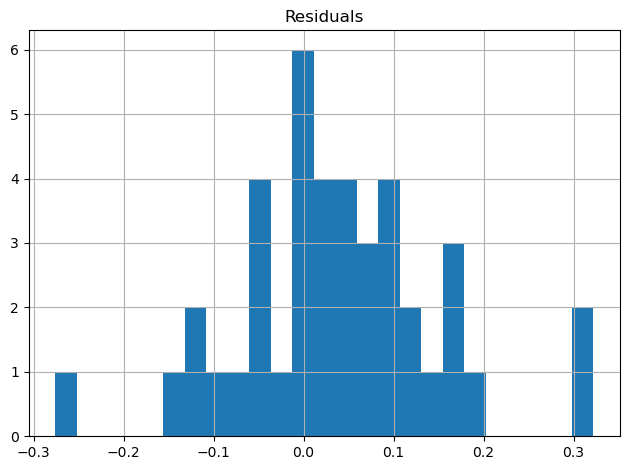

In [13]:
#Based on the better model of each stock, calculate the residual between predictions and real values of return interests.

#BCS Stock based on Adjusted R-squared score as f&f is the better model 
X1_test=sm.add_constant(X_test)
predicted_y = bcs_ff_reg.predict(X1_test)
stock_residuals_bcs = pd.DataFrame({'Predicted':predicted_y,'Actual':y_test, 'Residuals':y_test-predicted_y})
display(stock_residuals_bcs.head(10))

#plots histogram
residuals = y_test - predicted_y 
ax = pd.DataFrame({'Residuals':residuals}).hist(bins=25) 
plt.tight_layout() 
plt.show() 

,Predicted,Actual,Residuals
82,0.026674,0.003955,-0.022718
172,-0.001448,0.004965,0.006412
10,0.036062,0.183244,0.147182
4,0.016876,0.045560,0.028684
71,-0.008514,-0.054392,-0.045878
99,0.033479,0.058008,0.024529
5,-0.003673,0.039964,0.043637
125,-0.020712,-0.044917,-0.024205
75,-0.035231,-0.011166,0.024065
35,0.038640,0.114633,0.075993


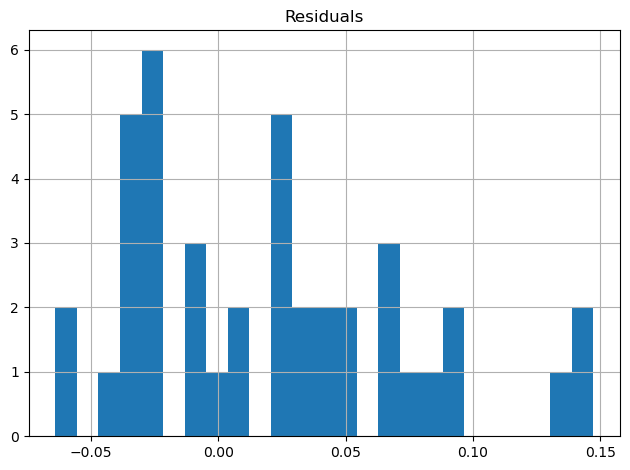

In [14]:
#ULVR Stock based on Adjusted R-squared score as f&f is the better model 
X1_test = sm.add_constant(X_test)
predicted_y = ulvr_ff_reg.predict(X1_test)
compare = pd.DataFrame({'Predicted':predicted_y,'Actual':y_test, 'Residuals':y_test-predicted_y})
display(compare.head(10))

#Plots histogram
residuals = y_test - predicted_y 
ax = pd.DataFrame({'Residuals':residuals}).hist(bins=25) 
plt.tight_layout() 
plt.show() 